# Tanzania Water Pump Project

## Project Overview:
The **Tanzania Water Pump Prediction Project** aims to develop a machine learning model to predict the condition of water pumps in Tanzania. The project uses data from various water points across the country to assess the functionality of the pumps, which is critical for ensuring access to clean water in both urban and rural areas. With over 57 million people in Tanzania, many communities rely on water pumps for their daily water needs, and some pumps fail, leaving residents without access to safe water.

## Project Goals:
The primary goal of this project is to predict the status of water points, whether they are:

- **Functional**: The pump is working and providing water.
- **Non-functional**: The pump is broken and requires repair.
- **Under maintenance**: The pump is temporarily out of service but will be repaired soon.

By predicting these statuses, the project seeks to achieve the following  objectives:

- **Identifying Malfunctioning Pumps**: The project helps in quickly identifying malfunctioning water pumps, enabling prompt repairs and minimizing service disruption for the local communities.

- **Evaluating the Installation of Pumps**: It assesses the effectiveness and quality of the initial pump installation to ensure that pumps are installed properly, which can influence their long-term functionality.

- **Assessing Management and Public Engagement**: The project checks if water points are under good management and whether regular public meetings are held to engage the local communities, ensuring that there is ongoing oversight and responsibility for maintenance.

- **Understanding Regional Usage and Demographics**: It helps to analyze the regions and the population that relies on these water pumps, providing insights into community access to water and identifying regions with the highest need for attention.

- **Funding Analysis**: The project examines the funding sources for the water pumps to assess how well-funded projects are and if funding is aligned with the performance and maintenance of the pumps.


## Importing the neccessary libraries 

In [244]:
# importing neccessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns
import scipy.stats as stats


# Data.
## Data understanding.
The **Tanzania Water Pump Dataset** contains detailed information about water points across Tanzania, focusing on the condition of water pumps, their installation, management, and the communities they serve. The dataset includes both categorical and numerical features such as:

- **Location Data**: Information about the pump's geographical location, including `longitude`, `latitude`, and `region`.
- **Pump Information**: Details about the pump type (`extraction_type`, `waterpoint_type`), installation (`funder`, `installer`), and the management of the pump (`scheme_management`, `management_group`).
- **Community Engagement**: Features like `population`, `public_meeting`, and `permit` indicate how the community is involved and whether the pump is being properly managed.
- **Water Quality and Source**: Features such as `water_quality` and `source` describe the water's characteristics and the source from which it is drawn.
- **Pump Status**: The target variable `status_group` categorizes pumps as **functional**, **non-functional**, or **under maintenance**.


In [24]:
# the independent variables for the train dataset
X_train_data = pd.read_csv("training set independent TZ.csv")
X_train_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [25]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)  # None will display all columns

# Now print your DataFrame
X_train_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [26]:
print(X_train_data['population'].unique())

[109 280 250 ... 845 976 788]


In [27]:
print(X_train_data['num_private'].unique())

[   0   39    5   45    6    3  698   32   15    7   25  102    1   93
   14   34  120   17  213   47    8   41   80  141   20   35  131    4
   22   11   87   61   65  136    2  180   38   62    9   16   23   42
   24   12  668  672   58  150  280  160   50 1776   30   27   10   94
   26  450  240  755   60  111  300   55 1402]


In [28]:
X_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [29]:
#checking for null values 
X_train_data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [30]:
# Check the number of rows in X_train_data
num_rows = X_train_data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 59400


In [31]:
Y_train_data = pd.read_csv("training set dependent TZ.csv")
Y_train_data

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [32]:
test_data = pd.read_csv("test set TZ.csv")
test_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [33]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)
test_data = pd.read_csv("test set TZ.csv")
test_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [145]:
X_train_data1 = pd.read_csv("training set independent TZ.csv")
X_train_data1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [148]:
add = X_train_data1[["extraction_type_class", "payment_type","quality_group","quantity_group","source_class","waterpoint_type_group","id"]]
add

,extraction_type_class,payment_type,quality_group,quantity_group,source_class,waterpoint_type_group,id
0,gravity,annually,good,enough,groundwater,communal standpipe,69572
1,gravity,never pay,good,insufficient,surface,communal standpipe,8776
2,gravity,per bucket,good,enough,surface,communal standpipe,34310
3,submersible,never pay,good,dry,groundwater,communal standpipe,67743
4,gravity,never pay,good,seasonal,surface,communal standpipe,19728
...,...,...,...,...,...,...,...
59395,gravity,per bucket,good,enough,groundwater,communal standpipe,60739
59396,gravity,annually,good,enough,surface,communal standpipe,27263
59397,handpump,monthly,fluoride,enough,groundwater,hand pump,37057
59398,handpump,never pay,good,insufficient,groundwater,hand pump,31282


In [173]:
tanzania_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  int32  
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  object 
 5   num_private            59400 non-null  int64  
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   region_code            59400 non-null  int64  
 9   population             59400 non-null  int64  
 10  public_meeting         59400 non-null  bool   
 11  scheme_management      59400 non-null  object 
 12  permit                 59400 non-null  bool   
 13  construction_year      59400 non-null  int64  
 14  management_group       59400 non-null  object 
 15  st

In [165]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         14850 non-null  float64
 1   date_recorded      14850 non-null  int64  
 2   funder             13981 non-null  object 
 3   gps_height         14850 non-null  int64  
 4   installer          13973 non-null  object 
 5   num_private        14850 non-null  int64  
 6   basin              14850 non-null  object 
 7   region             14850 non-null  object 
 8   region_code        14850 non-null  int64  
 9   population         14850 non-null  int64  
 10  public_meeting     14029 non-null  object 
 11  scheme_management  13881 non-null  object 
 12  permit             14113 non-null  object 
 13  construction_year  14850 non-null  int64  
 14  extraction_type    14850 non-null  object 
 15  management_group   14850 non-null  object 
 16  payment_type       148

In [168]:
test_data2 = pd.read_csv("test set TZ.csv")
test_data2

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [178]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         14850 non-null  float64
 1   date_recorded      14850 non-null  int64  
 2   funder             13981 non-null  object 
 3   gps_height         14850 non-null  int64  
 4   installer          13973 non-null  object 
 5   num_private        14850 non-null  int64  
 6   basin              14850 non-null  object 
 7   region             14850 non-null  object 
 8   region_code        14850 non-null  int64  
 9   population         14850 non-null  int64  
 10  public_meeting     14029 non-null  object 
 11  scheme_management  13881 non-null  object 
 12  permit             14113 non-null  object 
 13  construction_year  14850 non-null  int64  
 14  extraction_type    14850 non-null  object 
 15  management_group   14850 non-null  object 
 16  payment_type       148

In [177]:
tanzania_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  int32  
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  object 
 5   num_private            59400 non-null  int64  
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   region_code            59400 non-null  int64  
 9   population             59400 non-null  int64  
 10  public_meeting         59400 non-null  bool   
 11  scheme_management      59400 non-null  object 
 12  permit                 59400 non-null  bool   
 13  construction_year      59400 non-null  int64  
 14  management_group       59400 non-null  object 
 15  st

In [185]:
test_data.drop(["waterpoint_type"], axis=1, inplace=True)


In [192]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   date_recorded          14850 non-null  int64  
 2   funder                 13981 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   num_private            14850 non-null  int64  
 6   basin                  14850 non-null  object 
 7   region                 14850 non-null  object 
 8   region_code            14850 non-null  int64  
 9   population             14850 non-null  int64  
 10  public_meeting         14029 non-null  object 
 11  scheme_management      13881 non-null  object 
 12  permit                 14113 non-null  object 
 13  construction_year      14850 non-null  int64  
 14  extraction_type        14850 non-null  object 
 15  ma

In [202]:
set_tanzania = set(tanzania_data.columns)
set_test = set(test_data.columns)

# Find columns in tanzania_data but not in test_data
extra_in_tanzania = set_tanzania - set_test
print("Columns in tanzania_data but missing in test_data:", extra_in_tanzania)

# Find columns in test_data but not in tanzania_data
extra_in_test = set_test - set_tanzania
print("Columns in test_data but missing in tanzania_data:", extra_in_test)


Columns in tanzania_data but missing in test_data: {'status_group'}
Columns in test_data but missing in tanzania_data: set()


In [195]:
test_data2

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [197]:
extraction_class = test_data2[["extraction_type_class"]]


In [198]:
test_data = pd.concat([test_data, extraction_class], axis=1)

In [199]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   date_recorded          14850 non-null  int64  
 2   funder                 13981 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   num_private            14850 non-null  int64  
 6   basin                  14850 non-null  object 
 7   region                 14850 non-null  object 
 8   region_code            14850 non-null  int64  
 9   population             14850 non-null  int64  
 10  public_meeting         14029 non-null  object 
 11  scheme_management      13881 non-null  object 
 12  permit                 14113 non-null  object 
 13  construction_year      14850 non-null  int64  
 14  extraction_type        14850 non-null  object 
 15  ma

# Data preparation

## Data cleaning

In [34]:
# dropping irrelevant columns 
X_train_data.drop(["scheme_name","wpt_name"], axis=1, inplace=True)

In [35]:
# dropping irrelevant columns 
X_train_data.drop(["source_type","source","waterpoint_type"], axis=1, inplace=True)

In [36]:
# dropping irrelevant columns 
X_train_data.drop(["water_quantity","payment"], axis=1, inplace=True)

In [37]:
# dropping irrelevant columns 
X_train_data.drop(["management","extraction_type"], axis=1, inplace=True)

In [38]:
# dropping irrelevant columns 
X_train_data.drop(["ward","lga","district_code","subvillage"], axis=1, inplace=True)

In [39]:
X_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   date_recorded      59400 non-null  object 
 3   funder             55765 non-null  object 
 4   gps_height         59400 non-null  int64  
 5   installer          55745 non-null  object 
 6   longitude          59400 non-null  float64
 7   latitude           59400 non-null  float64
 8   num_private        59400 non-null  int64  
 9   basin              59400 non-null  object 
 10  region             59400 non-null  object 
 11  region_code        59400 non-null  int64  
 12  population         59400 non-null  int64  
 13  public_meeting     56066 non-null  object 
 14  recorded_by        59400 non-null  object 
 15  scheme_management  55523 non-null  object 
 16  permit             563

In [40]:
# Assuming X_train and y_train are already defined
tanzania_data = pd.concat([X_train_data, Y_train_data], axis=1)

tanzania_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,region_code,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,waterpoint_type,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,user-group,annually,soft,enough,spring,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,20,280,NaN,GeoData Consultants Ltd,Other,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Manyara,21,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,user-group,per bucket,soft,enough,dam,communal standpipe multiple,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kagera,18,0,True,GeoData Consultants Ltd,NaN,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,19728,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,3,125,True,GeoData Consultants Ltd,Water Board,True,1999,gravity,user-group,per bucket,soft,enough,spring,communal standpipe,60739,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,11,56,True,GeoData Consultants Ltd,VWC,True,1996,gravity,user-group,annually,soft,enough,river,communal standpipe,27263,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,0,Rufiji,Mbeya,12,0,True,GeoData Consultants Ltd,VWC,False,0,swn 80,user-group,monthly,fluoride,enough,machine dbh,hand pump,37057,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,1,0,True,GeoData Consultants Ltd,VWC,True,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,hand pump,31282,functional


In [41]:
# Check for missing values
tanzania_data.isnull().sum()


id                      0
amount_tsh              0
date_recorded           0
funder               3635
gps_height              0
installer            3655
longitude               0
latitude                0
num_private             0
basin                   0
region                  0
region_code             0
population              0
public_meeting       3334
recorded_by             0
scheme_management    3877
permit               3056
construction_year       0
extraction_type         0
management_group        0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
id                      0
status_group            0
dtype: int64

In [42]:
tanzania_data.loc[:, "funder"] = tanzania_data["funder"].fillna(tanzania_data["funder"].mode()[0])
tanzania_data.loc[:, "installer"] = tanzania_data["installer"].fillna(tanzania_data["installer"].mode()[0])
tanzania_data["scheme_management"] = tanzania_data.groupby("region")["scheme_management"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [161]:
tanzania_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  int32  
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  object 
 5   num_private            59400 non-null  int64  
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   region_code            59400 non-null  int64  
 9   population             59400 non-null  int64  
 10  public_meeting         59400 non-null  bool   
 11  scheme_management      59400 non-null  object 
 12  permit                 59400 non-null  bool   
 13  construction_year      59400 non-null  int64  
 14  extraction_type        59400 non-null  object 
 15  ma

In [163]:
tanzania_data.drop(["extraction_type", "water_quality", "quantity", "source"], axis=1, inplace=True)

In [164]:
tanzania_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  int32  
 2   funder                 59400 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  object 
 5   num_private            59400 non-null  int64  
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   region_code            59400 non-null  int64  
 9   population             59400 non-null  int64  
 10  public_meeting         59400 non-null  bool   
 11  scheme_management      59400 non-null  object 
 12  permit                 59400 non-null  bool   
 13  construction_year      59400 non-null  int64  
 14  management_group       59400 non-null  object 
 15  st

In [43]:
# Check for missing values
tanzania_data.isnull().sum()


id                      0
amount_tsh              0
date_recorded           0
funder                  0
gps_height              0
installer               0
longitude               0
latitude                0
num_private             0
basin                   0
region                  0
region_code             0
population              0
public_meeting       3334
recorded_by             0
scheme_management       0
permit               3056
construction_year       0
extraction_type         0
management_group        0
payment_type            0
water_quality           0
quantity                0
source                  0
waterpoint_type         0
id                      0
status_group            0
dtype: int64

In [45]:
test_data.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [46]:
test_data.drop(columns=['waterpoint_type'], inplace=True)

In [47]:
test_data.drop(columns=['management', 'extraction_type', 'recorded_by'], inplace=True)

In [48]:
test_data.drop(columns=['ward', 'lga', 'district_code',"subvillage"], inplace=True)

In [49]:
test_data1 = pd.read_csv("test set TZ.csv")
test_data1

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [50]:
test_data1 = test_data1[[, 'waterpoint']]
test_data1

,id,waterpoint_type
0,50785,other
1,51630,communal standpipe
2,17168,other
3,45559,other
4,49871,communal standpipe
...,...,...
14845,39307,communal standpipe
14846,18990,hand pump
14847,28749,communal standpipe
14848,33492,communal standpipe


In [51]:
test_data = test_data.merge(test_data1, on='id', how='left')
test_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,region,region_code,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type_x,waterpoint_type_y
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Manyara,21,321,True,Parastatal,NaN,True,2012,other,other,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Arusha,2,300,True,VWC,TPRI pipe line,True,2000,gravity,gravity,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Singida,13,500,True,VWC,P,NaN,2010,other,other,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Lindi,80,250,NaN,VWC,NaN,True,1987,other,other,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Ruvuma,10,60,NaN,Water Board,BRUDER,True,2000,gravity,gravity,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Pwani,6,20,True,VWC,Bagamoyo wate,True,1988,mono,mono,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Tanga,4,2960,True,VWC,NaN,False,1994,nira/tanira,nira/tanira,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Singida,13,200,True,VWC,NaN,NaN,2010,gravity,gravity,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Ruvuma,10,150,True,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [52]:
test_data


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,region,region_code,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type_x,waterpoint_type_y
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Manyara,21,321,True,Parastatal,NaN,True,2012,other,other,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Arusha,2,300,True,VWC,TPRI pipe line,True,2000,gravity,gravity,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Singida,13,500,True,VWC,P,NaN,2010,other,other,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Lindi,80,250,NaN,VWC,NaN,True,1987,other,other,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Ruvuma,10,60,NaN,Water Board,BRUDER,True,2000,gravity,gravity,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Pwani,6,20,True,VWC,Bagamoyo wate,True,1988,mono,mono,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Tanga,4,2960,True,VWC,NaN,False,1994,nira/tanira,nira/tanira,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Singida,13,200,True,VWC,NaN,NaN,2010,gravity,gravity,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Ruvuma,10,150,True,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  region                 14850 non-null  object 
 12  region_code            14850 non-null  int64  
 13  population             14850 non-null  int64  
 14  public_meeting         14029 non-null  object 
 15  sc

In [54]:
test_data.drop(columns=['waterpoint_type_y', 'source_class'], inplace=True)

In [55]:
test_data.drop(columns=['extraction_type', 'longitude', 'latitude'], inplace=True)

In [56]:
test_data.drop(columns=['wpt_name', 'scheme_name', 'payment'], inplace=True)

In [57]:
test_data.drop(columns=['water_quality', 'quantity', 'source'], inplace=True)

In [58]:
test_data['date_recorded'] = pd.to_datetime(test_data['date_recorded']).dt.year

In [106]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 0 to 14849
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         14850 non-null  float64
 1   date_recorded      14850 non-null  int64  
 2   funder             13981 non-null  object 
 3   gps_height         14850 non-null  int64  
 4   installer          13973 non-null  object 
 5   num_private        14850 non-null  int64  
 6   basin              14850 non-null  object 
 7   region             14850 non-null  object 
 8   region_code        14850 non-null  int64  
 9   population         14850 non-null  int64  
 10  public_meeting     14029 non-null  object 
 11  scheme_management  13881 non-null  object 
 12  permit             14113 non-null  object 
 13  construction_year  14850 non-null  int64  
 14  extraction_type    14850 non-null  object 
 15  management_group   14850 non-null  object 
 16  payment_type       148

In [112]:
tanzania_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   date_recorded      59400 non-null  int32  
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  int64  
 4   installer          59400 non-null  object 
 5   num_private        59400 non-null  int64  
 6   basin              59400 non-null  object 
 7   region             59400 non-null  object 
 8   region_code        59400 non-null  int64  
 9   population         59400 non-null  int64  
 10  public_meeting     59400 non-null  bool   
 11  scheme_management  59400 non-null  object 
 12  permit             59400 non-null  bool   
 13  construction_year  59400 non-null  int64  
 14  extraction_type    59400 non-null  object 
 15  management_group   59400 non-null  object 
 16  payment_type       594

In [ ]:
unique_recorded_by = tanzania_data['recorded_by'].unique()
print("Unique recorded_by values:", unique_recorded_by)

## Feature engineering

In [60]:
tanzania_data.loc[:, "public_meeting"] = tanzania_data["public_meeting"].fillna(False)
tanzania_data.loc[:, "permit"] = tanzania_data["permit"].fillna(False)


In [61]:
# Get the current year
current_year = datetime.now().year

# Calculate the age of the pumps
tanzania_data['pump_age'] = current_year - tanzania_data['construction_year']

# Display the updated dataframe
tanzania_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,region_code,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,waterpoint_type,id,status_group,pump_age
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,user-group,annually,soft,enough,spring,communal standpipe,69572,functional,26
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,20,280,False,GeoData Consultants Ltd,Other,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,8776,functional,15
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Manyara,21,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,user-group,per bucket,soft,enough,dam,communal standpipe multiple,34310,functional,16
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,67743,non functional,39
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kagera,18,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,19728,functional,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,3,125,True,GeoData Consultants Ltd,Water Board,True,1999,gravity,user-group,per bucket,soft,enough,spring,communal standpipe,60739,functional,26
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,11,56,True,GeoData Consultants Ltd,VWC,True,1996,gravity,user-group,annually,soft,enough,river,communal standpipe,27263,functional,29
59397,37057,0.0,2011-04-11,Government Of Tanzania,0,DWE,34.017087,-8.750434,0,Rufiji,Mbeya,12,0,True,GeoData Consultants Ltd,VWC,False,0,swn 80,user-group,monthly,fluoride,enough,machine dbh,hand pump,37057,functional,2025
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,1,0,True,GeoData Consultants Ltd,VWC,True,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,hand pump,31282,functional,2025


In [62]:
tanzania_data['pump_age'].unique()

array([  26,   15,   16,   39, 2025,   14,   38,   34,   47,   33,   17,
         51,   25,   23,   21,   53,   22,   45,   18,   52,   40,   55,
         30,   19,   63,   20,   28,   13,   29,   48,   42,   41,   35,
         43,   49,   37,   36,   50,   65,   64,   27,   62,   54,   31,
         57,   32,   24,   46,   58,   12,   56,   44,   61,   59,   60],
      dtype=int64)

In [63]:
tanzania_data['pump_age'] = tanzania_data['construction_year'].apply(
    lambda x: current_year - x if x > 0 else 0  # Set age to 0 if construction year is 0
)


In [64]:
tanzania_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,region_code,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,waterpoint_type,id,status_group,pump_age
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,user-group,annually,soft,enough,spring,communal standpipe,69572,functional,26
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,20,280,False,GeoData Consultants Ltd,Other,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,8776,functional,15
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Manyara,21,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,user-group,per bucket,soft,enough,dam,communal standpipe multiple,34310,functional,16
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,67743,non functional,39
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kagera,18,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,19728,functional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,3,125,True,GeoData Consultants Ltd,Water Board,True,1999,gravity,user-group,per bucket,soft,enough,spring,communal standpipe,60739,functional,26
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,11,56,True,GeoData Consultants Ltd,VWC,True,1996,gravity,user-group,annually,soft,enough,river,communal standpipe,27263,functional,29
59397,37057,0.0,2011-04-11,Government Of Tanzania,0,DWE,34.017087,-8.750434,0,Rufiji,Mbeya,12,0,True,GeoData Consultants Ltd,VWC,False,0,swn 80,user-group,monthly,fluoride,enough,machine dbh,hand pump,37057,functional,0
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,1,0,True,GeoData Consultants Ltd,VWC,True,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,hand pump,31282,functional,0


In [65]:
tanzania_data['date_recorded'] = tanzania_data['date_recorded'].str[:4].astype(int)

In [66]:
tanzania_data['pump_age'] = tanzania_data.apply(
    lambda row: current_year - row['construction_year'] if row['construction_year'] > 0 else current_year - row['date_recorded'],
    axis=1
)


In [67]:
tanzania_data 

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,region_code,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,management_group,payment_type,water_quality,quantity,source,waterpoint_type,id,status_group,pump_age
0,69572,6000.0,2011,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Iringa,11,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,user-group,annually,soft,enough,spring,communal standpipe,69572,functional,26
1,8776,0.0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Mara,20,280,False,GeoData Consultants Ltd,Other,True,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,8776,functional,15
2,34310,25.0,2013,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Manyara,21,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,user-group,per bucket,soft,enough,dam,communal standpipe multiple,34310,functional,16
3,67743,0.0,2013,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,90,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,user-group,never pay,soft,dry,machine dbh,communal standpipe multiple,67743,non functional,39
4,19728,0.0,2011,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kagera,18,0,True,GeoData Consultants Ltd,VWC,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,19728,functional,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013,Germany Republi,1210,CES,37.169807,-3.253847,0,Pangani,Kilimanjaro,3,125,True,GeoData Consultants Ltd,Water Board,True,1999,gravity,user-group,per bucket,soft,enough,spring,communal standpipe,60739,functional,26
59396,27263,4700.0,2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,0,Rufiji,Iringa,11,56,True,GeoData Consultants Ltd,VWC,True,1996,gravity,user-group,annually,soft,enough,river,communal standpipe,27263,functional,29
59397,37057,0.0,2011,Government Of Tanzania,0,DWE,34.017087,-8.750434,0,Rufiji,Mbeya,12,0,True,GeoData Consultants Ltd,VWC,False,0,swn 80,user-group,monthly,fluoride,enough,machine dbh,hand pump,37057,functional,14
59398,31282,0.0,2011,Malec,0,Musa,35.861315,-6.378573,0,Rufiji,Dodoma,1,0,True,GeoData Consultants Ltd,VWC,True,0,nira/tanira,user-group,never pay,soft,insufficient,shallow well,hand pump,31282,functional,14


In [68]:
tanzania_data['funder'].value_counts()

Government Of Tanzania    12719
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
                          ...  
Hery                          1
Regina Group                  1
Taasaf                        1
Afriican Reli                 1
Private Institutions          1
Name: funder, Length: 1897, dtype: int64

In [69]:
tanzania_data['installer'].value_counts()

DWE            21057
Government      1825
RWE             1206
Commu           1060
DANIDA          1050
               ...  
Ilaramataki        1
UN Habitat         1
Bahresa            1
FARM-AFRICA        1
john skwese        1
Name: installer, Length: 2145, dtype: int64

In [71]:
tanzania_data = tanzania_data.drop(columns=['recorded_by'])

In [73]:
tanzania_data = tanzania_data.drop(columns=['longitude', 'latitude'])

In [76]:
current_year = 2025 
test_data['pump_age'] = test_data['construction_year'].apply(
    lambda x: current_year - x if x > 0 else 0
)

In [77]:
test_data = test_data.drop('id', axis=1)

In [78]:
test_data['pump_age'].unique()

array([13, 25, 15, 38, 35, 18, 43, 28, 22, 19, 23,  0, 41, 36, 47, 17, 20,
       55, 16, 27, 54, 53, 42, 51, 33, 26, 21, 14, 37, 63, 39, 40, 56, 29,
       31, 65, 50, 44, 30, 62, 48, 24, 32, 34, 49, 45, 12, 46, 58, 52, 57,
       60, 64, 59, 61], dtype=int64)

In [217]:
# Compute median GPS height per region, ignoring 0 values
region_medians = tanzania_data.groupby("region")["gps_height"].apply(
    lambda x: np.median(x[x > 0]) if x[x > 0].size > 0 else 0  # Avoid empty slices
)

# Fill missing GPS heights where they are 0
tanzania_data.loc[tanzania_data["gps_height"] == 0, "gps_height"] = (
    tanzania_data["region"].map(region_medians)
)

In [218]:
print(tanzania_data["gps_height"].unique())

[1390. 1399.  686. ...  -90. 2091. 2366.]


# Data analysis

## Univariate analysis.

In [79]:
# descriptive satatics 
tanzania_data.describe()

,id,amount_tsh,date_recorded,gps_height,num_private,region_code,population,construction_year,id,pump_age
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,2011.921667,668.297239,0.474141,15.297003,179.909983,1300.652475,37115.131768,23.080505
std,21453.128371,2997.574558,0.958758,693.116350,12.236230,17.587406,471.482176,951.620547,21453.128371,12.254881
min,0.000000,0.000000,2002.000000,-90.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000
25%,18519.750000,0.000000,2011.000000,0.000000,0.000000,5.000000,0.000000,0.000000,18519.750000,14.000000
50%,37061.500000,0.000000,2012.000000,369.000000,0.000000,12.000000,25.000000,1986.000000,37061.500000,17.000000
75%,55656.500000,20.000000,2013.000000,1319.250000,0.000000,17.000000,215.000000,2004.000000,55656.500000,29.000000
max,74247.000000,350000.000000,2013.000000,2770.000000,1776.000000,99.000000,30500.000000,2013.000000,74247.000000,65.000000


### Checking  the pump age 

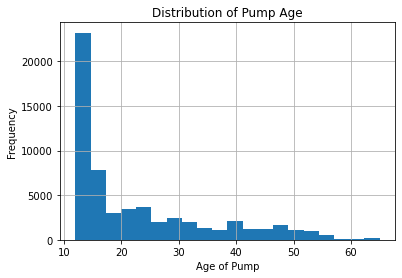

In [80]:
tanzania_data['pump_age'].hist(bins=20)
plt.title('Distribution of Pump Age')
plt.xlabel('Age of Pump')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='pump_age'>

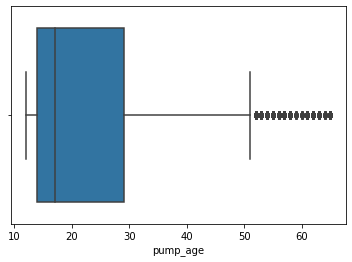

In [81]:
sns.boxplot(x=tanzania_data['pump_age'])

In [117]:
common_age = tanzania_data['pump_age'].mode()[0]
common_age

14

Most of the pumps had an age range between 10 to 20 years, with 14 years being the most common age

### Checking  wether public  meetings were held?

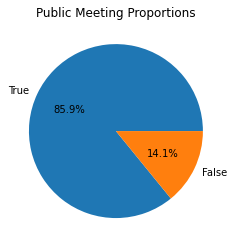

In [82]:
#checking wether they were attending the public meetings.
tanzania_data['public_meeting'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Public Meeting Proportions')
plt.ylabel('')
plt.show()

Public meetings were set and attended, with an attendance rate of 85.9% compared to 14.1% non-attendance

### Checking wether permits were handed out?

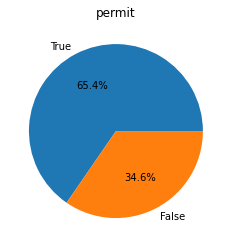

In [114]:
#checking wether they were attending the public meetings.
tanzania_data['permit'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('permit')
plt.ylabel('')
plt.show()

Permits were issued for 65.4% of wells, while 34.6% did not receive permits.

### Checking the water quality?

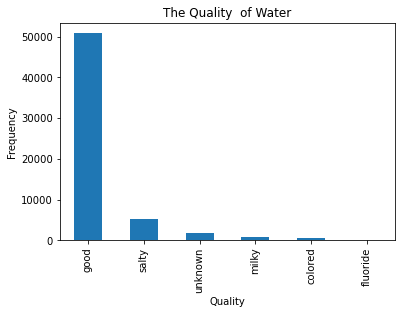

In [203]:
tanzania_data['quality_group'].value_counts().plot(kind='bar')
plt.title('The Quality  of Water')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

The water quality of most wells was soft, except for a few that were slightly salty or milky

### Which scheme  management runs  most of  the pumps?

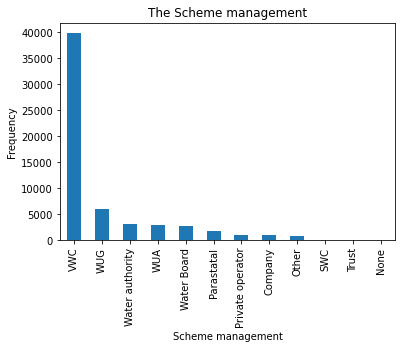

In [86]:
tanzania_data['scheme_management'].value_counts().plot(kind='bar')
plt.title('The Scheme management')
plt.xlabel('Scheme management')
plt.ylabel('Frequency')
plt.show()

Most water wells were managed by WWC scheme management, followed by WUG in second place, the water authority in third, the water board in fourth, and parastatals in fifth.

### Status of most  of the  water pumps

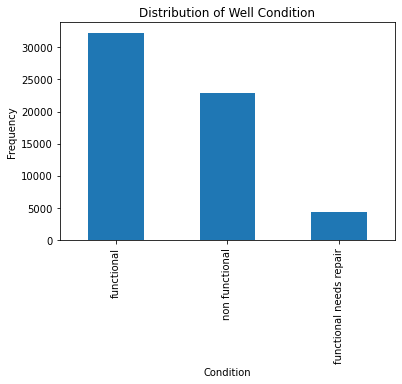

In [87]:
tanzania_data['status_group'].value_counts().plot(kind='bar')
plt.title('Distribution of Well Condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

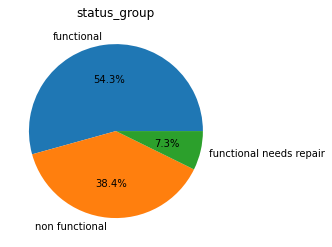

In [118]:
tanzania_data['status_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('status_group')
plt.ylabel('')
plt.show()

### Which extraction type are most of the wells running on?

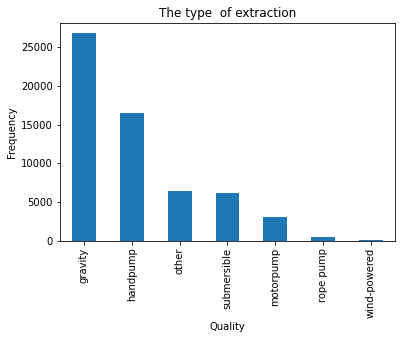

In [204]:
tanzania_data['extraction_type_class'].value_counts().plot(kind='bar')
plt.title('The type  of extraction')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

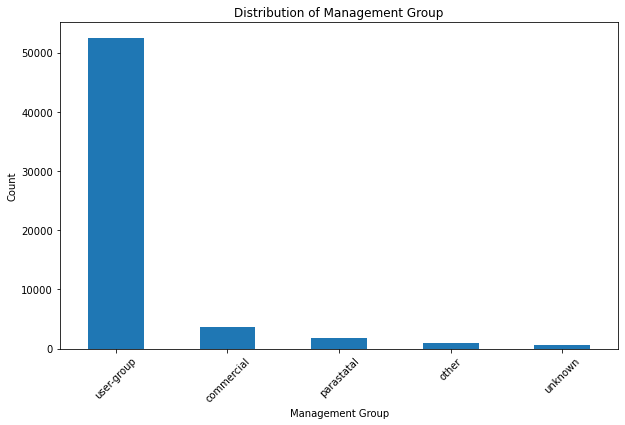

In [90]:
tanzania_data['management_group'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Management Group')
plt.xlabel('Management Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Most of the management groups were user-managed, followed by commercial management, and then parastatals

###  Ammount that the users pay.

In [210]:
np.set_printoptions(suppress=True)  # Disable scientific notation

unique_values = tanzania_data["amount_tsh"].unique()
print(unique_values)

[  6000.        0.       25.       20.      200.      500.       50.
   4000.     1500.        6.      250.       10.     1000.      100.
     30.     2000.      400.     1200.       40.      300.    25000.
    750.     5000.      600.     7200.     2400.        5.     3600.
    450.    40000.    12000.     3000.        7.    20000.     2800.
   2200.       70.     5500.    10000.     2500.     6500.      550.
     33.     8000.     4700.     7000.    14000.     1300.   100000.
    700.        1.       60.      350.        0.2      35.      306.
   8500.   117000.     3500.      520.       15.     6300.     9000.
    150.   120000.   138000.   350000.     4500.    13000.    45000.
      2.    15000.    11000.    50000.     7500.    16300.      800.
  16000.    30000.       53.     5400.    70000.   250000.   200000.
  26000.    18000.       26.      590.      900.        9.     1400.
 170000.      220.    38000.        0.25     12.    60000.       59.  ]


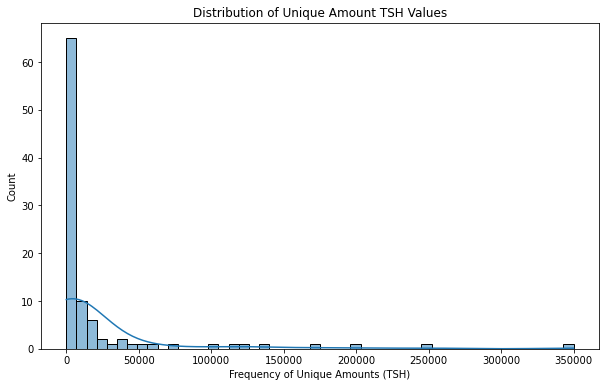

In [212]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(unique_values, bins=50, kde=True)

# Labels and title
plt.xlabel("Frequency of Unique Amounts (TSH)")
plt.ylabel("Count")
plt.title("Distribution of Unique Amount TSH Values")

# Show plot
plt.show()

Most users access the wells for free, but some pay between **50,000 TSH and 350,000 TSH** for water usage.

### distribution of the gps height 

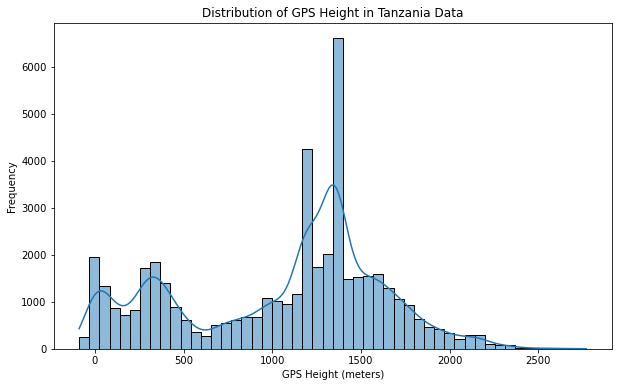

In [219]:
plt.figure(figsize=(10, 6))
sns.histplot(tanzania_data["gps_height"], bins=50, kde=True)
plt.xlabel("GPS Height (meters)")
plt.ylabel("Frequency")
plt.title("Distribution of GPS Height in Tanzania Data")
plt.show()

### how did most users pay?

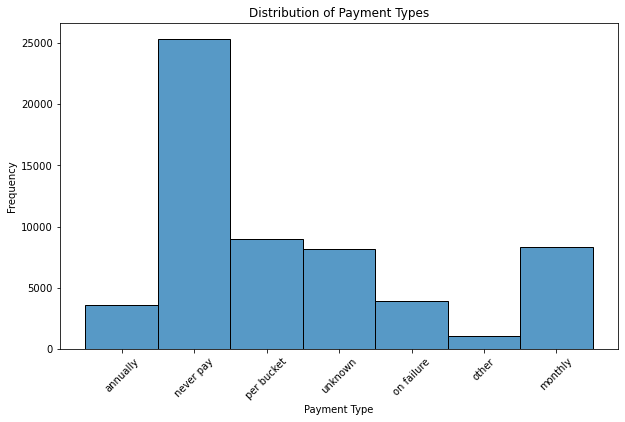

In [206]:
plt.figure(figsize=(10, 6))
sns.histplot(tanzania_data["payment_type"], bins=len(tanzania_data["payment_type"].unique()), kde=False)

plt.xlabel("Payment Type")
plt.ylabel("Frequency")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

### who are the  top 10 funders?

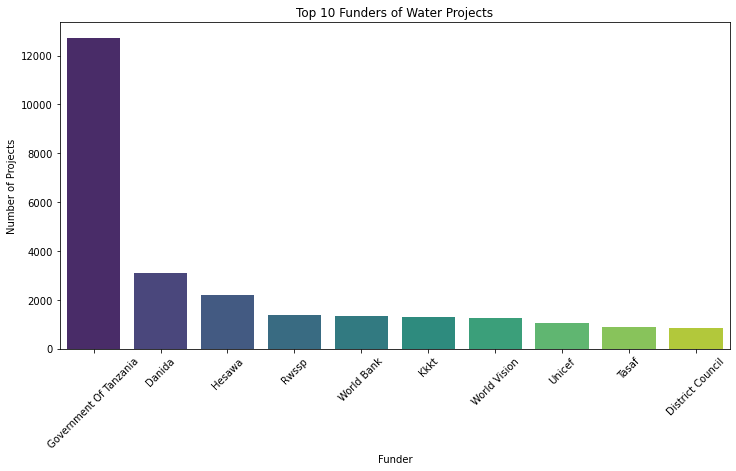

In [133]:
# Get top 10 funders by count
top_funders = tanzania_data["funder"].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_funders.index, y=top_funders.values, palette="viridis")
plt.xlabel("Funder")
plt.ylabel("Number of Projects")
plt.title("Top 10 Funders of Water Projects")
plt.xticks(rotation=45)
plt.show()

### top 10 installers

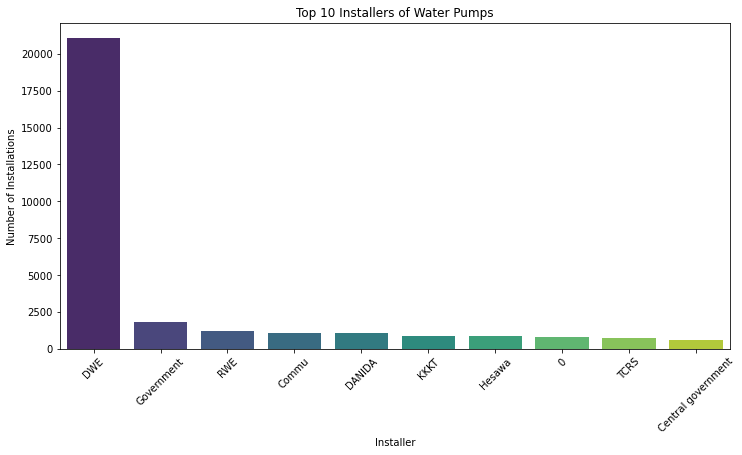

In [135]:
top_installers = tanzania_data["installer"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_installers.index, y=top_installers.values, palette="viridis")
plt.xlabel("Installer")
plt.ylabel("Number of Installations")
plt.title("Top 10 Installers of Water Pumps")
plt.xticks(rotation=45)
plt.show()


### how much is the quantity of  water coming from  the wells

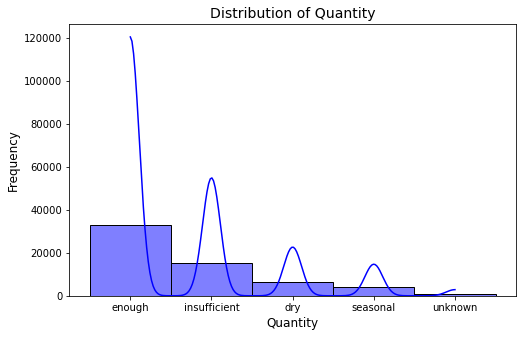

In [220]:
plt.figure(figsize=(8, 5))
sns.histplot(tanzania_data["quantity_group"], bins=10, kde=True, color="blue")
plt.xlabel("Quantity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Quantity", fontsize=14)
plt.show()

###  what is the source class of the water  from the  well??

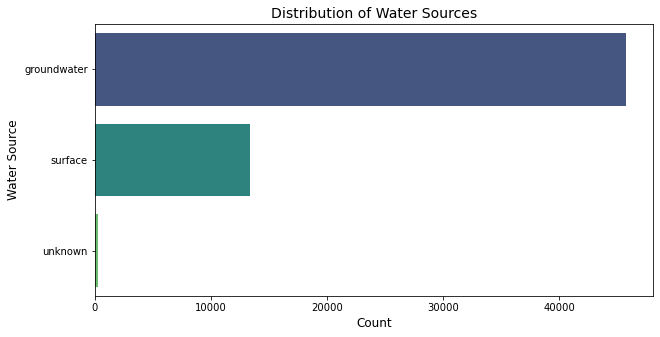

In [222]:
plt.figure(figsize=(10, 5))
sns.countplot(y=tanzania_data["source_class"], order=tanzania_data["source_class"].value_counts().index, palette="viridis")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Water Source", fontsize=12)
plt.title("Distribution of Water Sources", fontsize=14)
plt.show()

Most of the water sources are from groundwater, while a smaller portion comes from surface water sources.

## bivariate analysis

### checking the population distribution per region

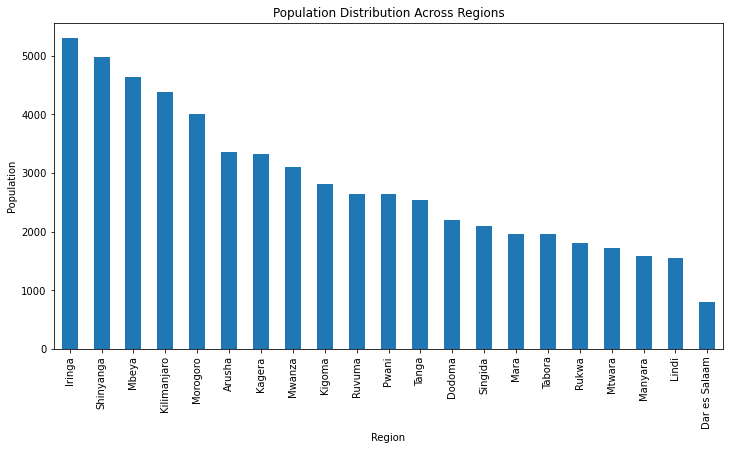

In [92]:
tanzania_data['region'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Population Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Population')
plt.show()

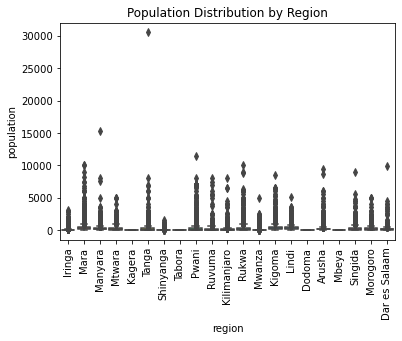

In [93]:
sns.boxplot(x='region', y='population', data=tanzania_data)
plt.xticks(rotation=90)
plt.title('Population Distribution by Region')
plt.show()

### comparing the scheme management vs the status of the pumps

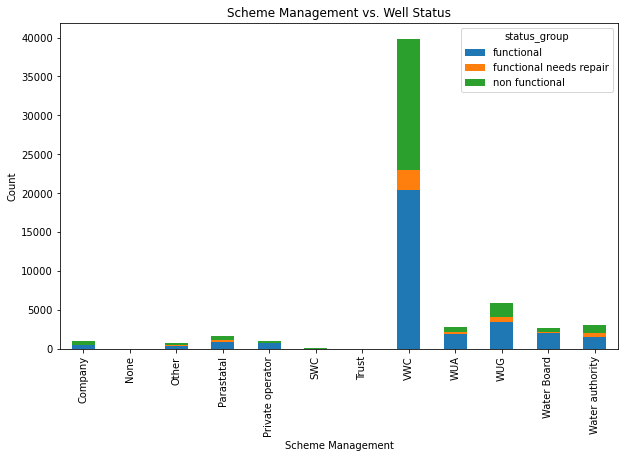

In [94]:
tanzania_data.groupby(['scheme_management', 'status_group']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Scheme Management vs. Well Status')
plt.ylabel('Count')
plt.xlabel('Scheme Management')
plt.show()

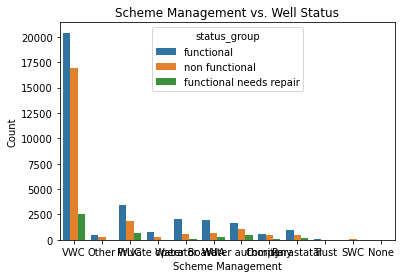

In [95]:
sns.countplot(x='scheme_management', hue='status_group', data=tanzania_data)
plt.title('Scheme Management vs. Well Status')
plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.show()

### checking wether the scheme management were issued permits

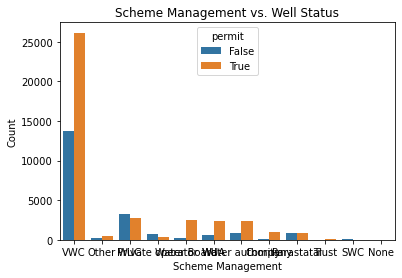

In [120]:
sns.countplot(x='scheme_management', hue='permit', data=tanzania_data)
plt.title('Scheme Management vs. Well Status')
plt.xlabel('Scheme Management')
plt.ylabel('Count')
plt.show()

### checking wether the management groups have permit 

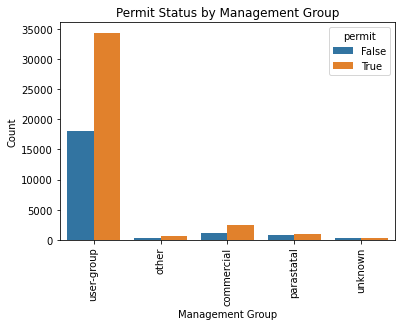

In [96]:
# Create a count plot to compare 'management_group' with 'permit'
sns.countplot(x='management_group', hue='permit', data=tanzania_data)
plt.title('Permit Status by Management Group')
plt.xlabel('Management Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### population by  management group

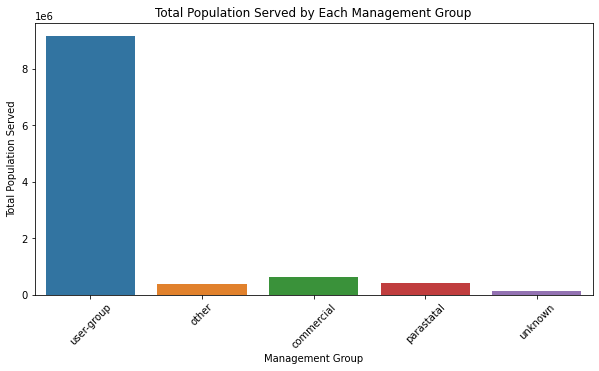

In [230]:
plt.figure(figsize=(10, 5))
sns.barplot(x="management_group", y="population", data=tanzania_data, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.ylabel("Total Population Served")
plt.xlabel("Management Group")
plt.title("Total Population Served by Each Management Group")
plt.show()

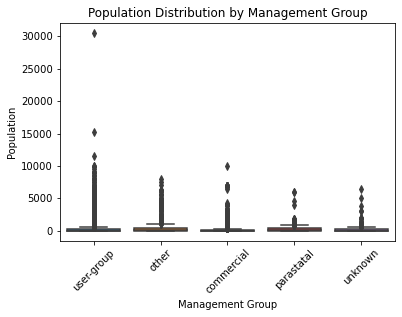

In [97]:
#populatin by management.
sns.boxplot(x='management_group', y='population', data=tanzania_data)
plt.title('Population Distribution by Management Group')
plt.xlabel('Management Group')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

### checkin g the trend across the age an d  status group

<Figure size 864x432 with 0 Axes>

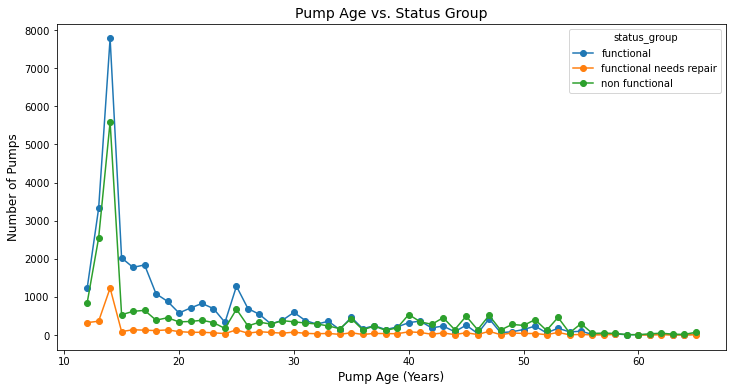

In [239]:
plt.figure(figsize=(12, 6))
tanzania_data.groupby(["pump_age", "status_group"]).size().unstack().plot(kind="line", marker="o", figsize=(12, 6))

plt.xlabel("Pump Age (Years)", fontsize=12)
plt.ylabel("Number of Pumps", fontsize=12)
plt.title("Pump Age vs. Status Group", fontsize=14)
plt.show()

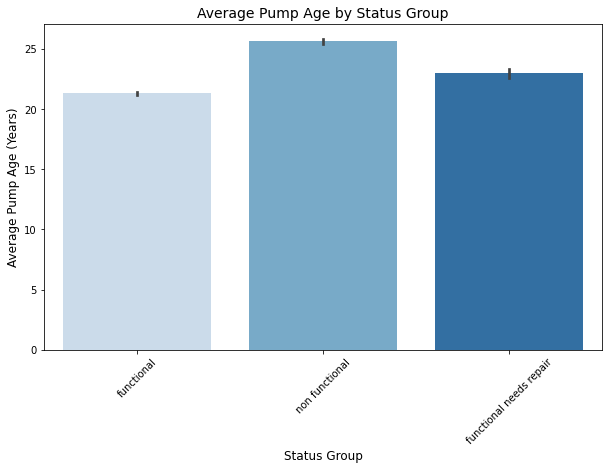

In [238]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status_group", y="pump_age", data=tanzania_data, estimator=lambda x: x.mean(), palette="Blues")

plt.xlabel("Status Group", fontsize=12)
plt.ylabel("Average Pump Age (Years)", fontsize=12)
plt.title("Average Pump Age by Status Group", fontsize=14)
plt.xticks(rotation=45)
plt.show()

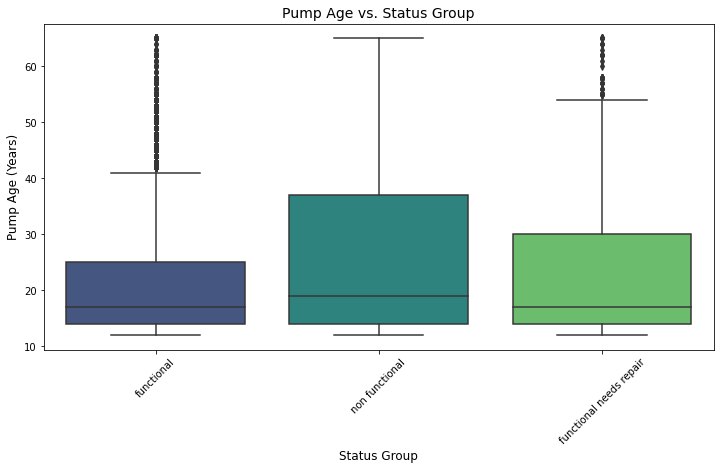

In [237]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="status_group", y="pump_age", data=tanzania_data, palette="viridis")

plt.xlabel("Status Group", fontsize=12)
plt.ylabel("Pump Age (Years)", fontsize=12)
plt.title("Pump Age vs. Status Group", fontsize=14)
plt.xticks(rotation=45)
plt.show()

### c hecking well management vs functio nality 

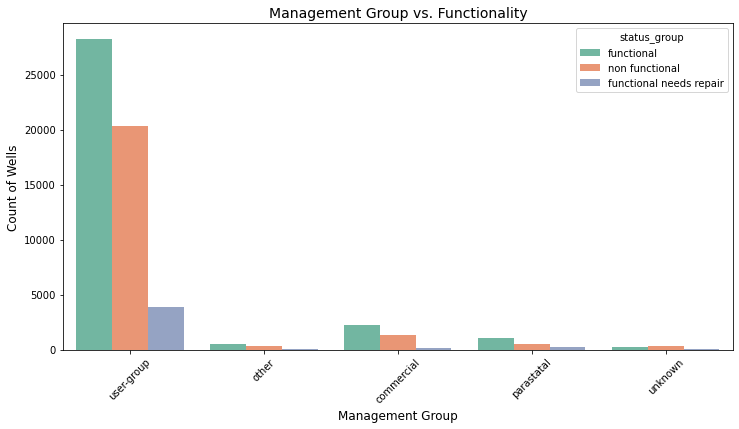

In [240]:
plt.figure(figsize=(12, 6))
sns.countplot(x="management_group", hue="status_group", data=tanzania_data, palette="Set2")

plt.xlabel("Management Group", fontsize=12)
plt.ylabel("Count of Wells", fontsize=12)
plt.title("Management Group vs. Functionality", fontsize=14)
plt.xticks(rotation=45)
plt.show()


### populatuon by manaagement group

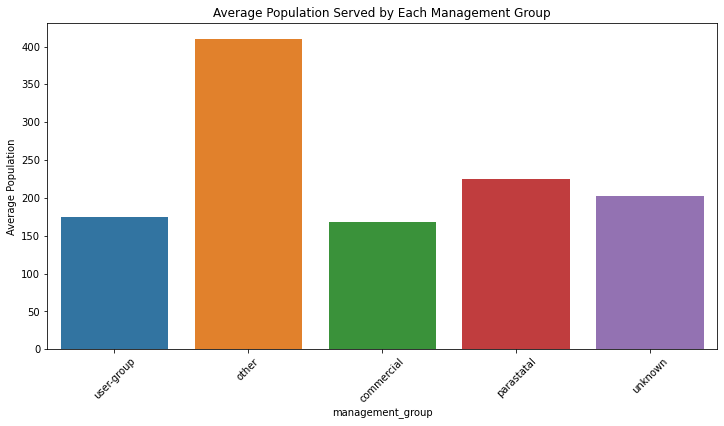

In [243]:
plt.figure(figsize=(12,6))
sns.barplot(x="management_group", y="population", data=tanzania_data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)
plt.ylabel("Average Population")
plt.title("Average Population Served by Each Management Group")
plt.show()


## Multivariate analysis

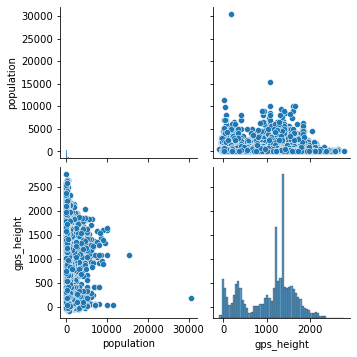

In [248]:
sns.pairplot(tanzania_data[['population', 'gps_height', 'construction_year']])
plt.show()

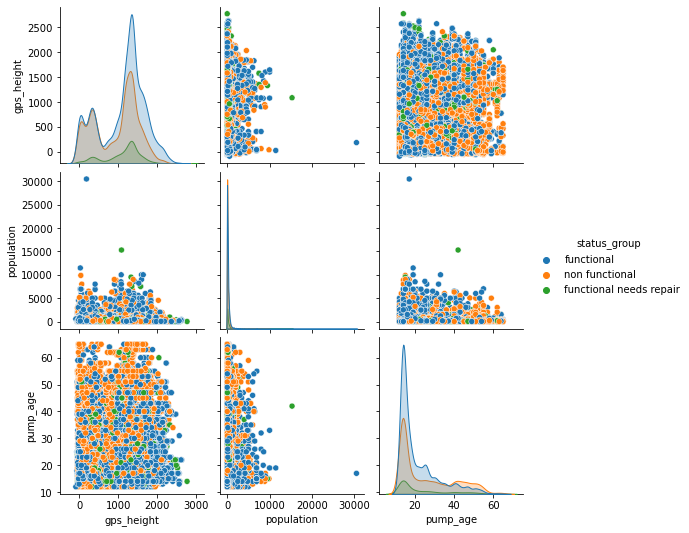

In [249]:
sns.pairplot(tanzania_data, vars=["gps_height", "population", "pump_age"], hue="status_group")
plt.show()


In [241]:
tanzania_data.corr()

,amount_tsh,gps_height,num_private,region_code,population,public_meeting,permit,pump_age,id
amount_tsh,1.000000,0.025271,0.002944,-0.026813,0.016288,0.025683,0.025042,0.033813,-0.005321
gps_height,0.025271,1.000000,-0.017743,-0.295731,-0.096843,0.030079,0.002085,-0.064839,-0.006107
num_private,0.002944,-0.017743,1.000000,-0.020377,0.003818,0.011230,0.011962,0.017523,-0.002629
region_code,-0.026813,-0.295731,-0.020377,1.000000,0.094088,-0.044806,-0.010835,0.024029,-0.003028
population,0.016288,-0.096843,0.003818,0.094088,1.000000,-0.000398,-0.034684,0.122728,-0.002813
public_meeting,0.025683,0.030079,0.011230,-0.044806,-0.000398,1.000000,0.140349,0.004557,0.000923
permit,0.025042,0.002085,0.011962,-0.010835,-0.034684,0.140349,1.000000,0.072490,-0.000588
pump_age,0.033813,-0.064839,0.017523,0.024029,0.122728,0.004557,0.072490,1.000000,0.001711
id,-0.005321,-0.006107,-0.002629,-0.003028,-0.002813,0.000923,-0.000588,0.001711,1.000000


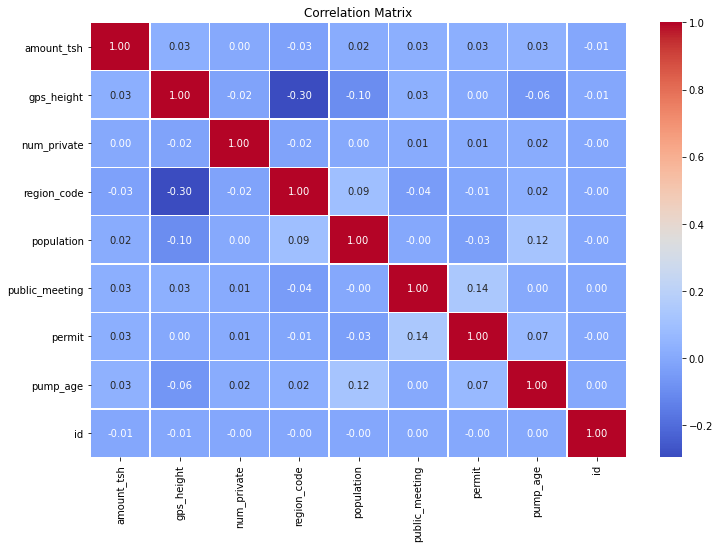

In [242]:
# Calculate the correlation matrix for the variables
correlation_matrix = tanzania_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [245]:
# Create a contingency table
contingency_table = pd.crosstab(tanzania_data["management_group"], tanzania_data["status_group"])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between management group and status group.")
else:
    print("No significant relationship found.")


Chi-Square Value: 287.65157783580787
P-Value: 1.744626138526002e-57
There is a significant relationship between management group and status group.


In [247]:
# Create a contingency table
contingency_table = pd.crosstab(tanzania_data["scheme_management"], tanzania_data["source_class"])

# Perform Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between scheme management and water sourc e c lass.")
else:
    print("No significant relationship found.")


Chi-Square Value: 5746.535787577298
P-Value: 0.0
There is a significant relationship between scheme management and water sourc e c lass.


In [250]:
# Create groups
functional = tanzania_data[tanzania_data["status_group"] == "functional"]["pump_age"]
non_functional = tanzania_data[tanzania_data["status_group"] == "non functional"]["pump_age"]
functional_needs_repair = tanzania_data[tanzania_data["status_group"] == "functional needs repair"]["pump_age"]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(functional, non_functional, functional_needs_repair)

print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in pump age across different status groups.")
else:
    print("No significant difference found.")


F-Statistic: 857.7317293393862
P-Value: 0.0
There is a significant difference in pump age across different status groups.


# Feature selection

In [136]:
tanzania_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   date_recorded      59400 non-null  int32  
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  int64  
 4   installer          59400 non-null  object 
 5   num_private        59400 non-null  int64  
 6   basin              59400 non-null  object 
 7   region             59400 non-null  object 
 8   region_code        59400 non-null  int64  
 9   population         59400 non-null  int64  
 10  public_meeting     59400 non-null  bool   
 11  scheme_management  59400 non-null  object 
 12  permit             59400 non-null  bool   
 13  construction_year  59400 non-null  int64  
 14  extraction_type    59400 non-null  object 
 15  management_group   59400 non-null  object 
 16  payment_type       594

## defining features and target 

In [143]:
X = tanzania_data.drop(columns=["extraction_type", "scheme_management","status_group","funder","installer","num_private","region","basin"])
X

,amount_tsh,date_recorded,gps_height,region_code,population,public_meeting,permit,construction_year,management_group,payment_type,water_quality,quantity,source,pump_age
0,6000.0,2011,1390,11,109,True,False,1999,user-group,annually,soft,enough,spring,26
1,0.0,2013,1399,20,280,False,True,2010,user-group,never pay,soft,insufficient,rainwater harvesting,15
2,25.0,2013,686,21,250,True,True,2009,user-group,per bucket,soft,enough,dam,16
3,0.0,2013,263,90,58,True,True,1986,user-group,never pay,soft,dry,machine dbh,39
4,0.0,2011,0,18,0,True,True,0,other,never pay,soft,seasonal,rainwater harvesting,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013,1210,3,125,True,True,1999,user-group,per bucket,soft,enough,spring,26
59396,4700.0,2011,1212,11,56,True,True,1996,user-group,annually,soft,enough,river,29
59397,0.0,2011,0,12,0,True,False,0,user-group,monthly,fluoride,enough,machine dbh,14
59398,0.0,2011,0,1,0,True,True,0,user-group,never pay,soft,insufficient,shallow well,14


In [131]:
y = tanzania_data["status_group"]
y

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

# Modelling 